<a href="https://colab.research.google.com/github/lucyporte/ATS/blob/main/portfilio-management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 307 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import copy
import matplotlib.pyplot as plt

In [ ]:
def CAGR(DF):
    "function to calculate the Cumulative Annual Growth Rate of a trading strategy"
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    n = len(df)/12
    CAGR = (df["cum_return"].tolist()[-1])**(1/n) - 1
    return CAGR

def volatility(DF):
    "function to calculate annualized volatility of a trading strategy"
    df = DF.copy()
    vol = df["mon_ret"].std() * np.sqrt(12)
    return vol

def sharpe(DF,rf):
    "function to calculate sharpe ratio ; rf is the risk free rate"
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr
    

def max_dd(DF):
    df=pflio(return_df,6,3)
    "function to calculate max drawdown"
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd

# Download historical data (monthly) for DJI constituent stocks

tickers = ["MMM","AXP","T","BA","CAT","CVX","CSCO","KO", "XOM","GE","GS","HD",
           "IBM","INTC","JNJ","JPM","MCD","MRK","MSFT","NKE","PFE","PG","TRV",
           "UTX","UNH","VZ","V","WMT","DIS"]

ohlc_mon = {} # directory with ohlc value for each stock            
start = dt.datetime.today()-dt.timedelta(1900)
end = dt.datetime.today()

# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    ohlc_mon[ticker] = yf.download(ticker,start,end,interval='1mo')
    ohlc_mon[ticker].dropna(inplace=True,how="all")
 
tickers = ohlc_mon.keys() # redefine tickers variable after removing any tickers with corrupted data

################################Backtesting####################################

# calculating monthly return for each stock and consolidating return info by stock in a separate dataframe
ohlc_dict = copy.deepcopy(ohlc_mon)
return_df = pd.DataFrame()
for ticker in tickers:
    print("calculating monthly return for ",ticker)
    ohlc_dict[ticker]["mon_ret"] = ohlc_dict[ticker]["Adj Close"].pct_change()
    return_df[ticker] = ohlc_dict[ticker]["mon_ret"]


# function to calculate portfolio return iteratively
def pflio(DF,m,x):
    """Returns cumulative portfolio return
    DF = dataframe with monthly return info for all stocks
    m = number of stock in the portfolio
    x = number of underperforming stocks to be removed from portfolio monthly"""
    df = DF.copy()
    portfolio = []
    monthly_ret = [0]
    print(len(df))
    for i in range(1,len(df)):
        if len(portfolio) > 0:
            monthly_ret.append(df[portfolio].iloc[i,:].mean())
            bad_stocks = df[portfolio].iloc[i,:].sort_values(ascending=True)[:x].index.values.tolist()
            portfolio = [t for t in portfolio if t not in bad_stocks]
        fill = m - len(portfolio)
        new_picks = df.iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist()
        portfolio = portfolio + new_picks
        print(portfolio)
    monthly_ret_df = pd.DataFrame(np.array(monthly_ret),columns=["mon_ret"])
    return monthly_ret_df


#calculating overall strategy's KPIs
print("CAGR",CAGR(pflio(return_df,6,3)))
print("sharpe",sharpe(pflio(return_df,6,3),0.025))
print("max_dd",max_dd(pflio(return_df,6,3)))

#calculating KPIs for Index buy and hold strategy over the same period
DJI = yf.download("^DJI",dt.date.today()-dt.timedelta(1900),dt.date.today(),interval='1mo')
DJI["mon_ret"] = DJI["Adj Close"].pct_change()
print("CAGR DJI",CAGR(DJI))
print("sharpe DJI",sharpe(DJI,0.025))
print("max dd DJI",max_dd(DJI))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
sp500 = yf.download("SPY",dt.date.today()-dt.timedelta(1900),dt.date.today(),interval='1mo')
sp500["mon_ret"] = sp500["Adj Close"].pct_change()

[*********************100%***********************]  1 of 1 completed


63
['WMT', 'CSCO', 'T', 'NKE', 'UNH', 'HD']
['T', 'NKE', 'HD', 'CAT', 'BA', 'T']
['NKE', 'HD', 'BA', 'BA', 'TRV', 'MSFT']
['BA', 'BA', 'MSFT', 'CSCO', 'INTC', 'BA']
['MSFT', 'CSCO', 'INTC', 'INTC', 'CVX', 'PG']
['MSFT', 'CSCO', 'CVX', 'UNH', 'CVX', 'MRK']
['MSFT', 'UNH', 'MRK', 'INTC', 'CAT', 'MSFT']
['UNH', 'MRK', 'NKE', 'PG', 'VZ', 'DIS']
['MRK', 'PG', 'DIS', 'JPM', 'PFE', 'MRK']
['MRK', 'PFE', 'MRK', 'CSCO', 'WMT', 'V']
['MRK', 'PFE', 'MRK', 'CAT', 'BA', 'XOM']
['MRK', 'PFE', 'MRK', 'VZ', 'WMT', 'PG']
['MRK', 'MRK', 'PG', 'CAT', 'AXP', 'MMM']
['MRK', 'MRK', 'PG', 'GE', 'NKE', 'PG']
['GE', 'NKE', 'GE', 'BA', 'GS', 'IBM']
['GE', 'GE', 'BA', 'BA', 'INTC', 'CSCO']
['INTC', 'CSCO', 'MSFT', 'V', 'PG', 'CSCO']
['MSFT', 'V', 'DIS', 'JPM', 'MSFT', 'GS']
['V', 'DIS', 'UNH', 'PFE', 'TRV', 'T']
['V', 'DIS', 'T', 'CAT', 'GS', 'GE']
['V', 'DIS', 'GS', 'PG', 'GS', 'IBM']
['V', 'DIS', 'PG', 'BA', 'HD', 'VZ']
['PG', 'BA', 'VZ', 'NKE', 'INTC', 'IBM']
['PG', 'VZ', 'INTC', 'UNH', 'GE', 'INTC']
['UNH', 

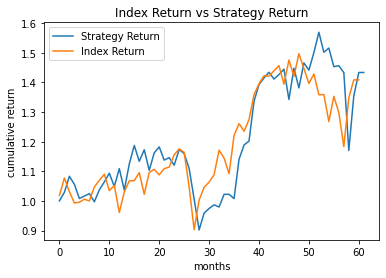

In [ ]:
fig, ax = plt.subplots()
plt.plot((1+pflio(return_df,6,3)).cumprod())
plt.plot((1+DJI["mon_ret"][2:].reset_index(drop=True)).cumprod())
plt.plot((1+sp500["mon_ret"][2:].reset_index(drop=True)).cumprod())

plt.title("Index Return vs Strategy Return")
plt.ylabel("cumulative return")
plt.xlabel("months")
ax.legend(["Strategy Return","Index Return"])